In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import warnings
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", RuntimeWarning)

import sys
sys.path.append('../../dstorch/')

import matplotlib.pyplot as plt
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [8]:
from dstorch import preprocessing, draw, transforms, predict, postprocessing, metrics, utils, io
import cv2
import os
import torch
import numpy as np
import pandas as pd
from tqdm import tqdm
import pydash as _

In [4]:
TEST_PATH = '../data/stage1_test/'
test_ids, _ = io.read_test_data(TEST_PATH, d=3)

test_images = []
for _id in tqdm(test_ids):
    test_images.append(cv2.imread("../output_data/without_scale_05/test/{}.png".format(_id)))

100%|██████████| 65/65 [00:00<00:00, 320.86it/s]


In [9]:
def get_predictions(model_path, ids, images, path_images, resize):
    transform = transforms.DualCompose(
        [
            transforms.ImageOnly(transforms.Normalize(
                mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225]))
        ]
    )
    model = torch.load(model_path)
    predictions = predict.predict(model, ids, path_images, transform, 64, 2, 1)

    if resize:
        predictions = [cv2.resize(x, (y.shape[1], y.shape[0])) for x, y in zip(predictions, images)]

    return predictions

In [82]:
def weighted_sum(predictions, weights):
    return np.sum(np.stack(predictions) * np.array(weights)[..., np.newaxis, np.newaxis, np.newaxis], axis=0) / np.sum(weights)


def make_ensemble(weights, *all_predictions):
    return [weighted_sum(predictions, weights) for predictions in zip(*all_predictions)]

In [11]:
without_scale_05_predictions = get_predictions(
    'models/TernausNet34_without_scale_05_epoch_500/best.pth', test_ids, 
    test_images, '../output_data/without_scale_05/test/{}.png', False
)

Predict: 100%|██████████| 65/65 [00:04<00:00, 15.09it/s]


In [12]:
with_scale_05_best_predictions = get_predictions(
    'models/TernausNet34_with_scale_05_epoch_600/best.pth', test_ids, 
    test_images, '../output_data/with_scale_05/scaled_test/{}.png', True
)

with_scale_05_589_predictions = get_predictions(
    'models/TernausNet34_with_scale_05_epoch_600/local_589.pth', test_ids, 
    test_images, '../output_data/with_scale_05/scaled_test/{}.png', True
)

with_scale_05_489_predictions = get_predictions(
    'models/TernausNet34_with_scale_05_epoch_600/local_489.pth', test_ids, 
    test_images, '../output_data/with_scale_05/scaled_test/{}.png', True
)

with_scale_05_389_predictions = get_predictions(
    'models/TernausNet34_with_scale_05_epoch_600/local_389.pth', test_ids, 
    test_images, '../output_data/with_scale_05/scaled_test/{}.png', True
)

with_scale_05_289_predictions = get_predictions(
    'models/TernausNet34_with_scale_05_epoch_600/local_289.pth', test_ids, 
    test_images, '../output_data/with_scale_05/scaled_test/{}.png', True
)

Predict: 100%|██████████| 65/65 [00:03<00:00, 20.46it/s]


In [83]:
with_scale_05_predictions = make_ensemble(
    [0.2, 0.2, 0.2, 0.2, 0.2], 
    with_scale_05_best_predictions,
    with_scale_05_589_predictions, 
    with_scale_05_489_predictions, 
    with_scale_05_389_predictions, 
    with_scale_05_289_predictions
)

In [76]:
with_scale_05_03_only_centers_689_predictions = get_predictions(
    'models/TernausNet34_with_scale_05_03_only_centers_700/local_689.pth', test_ids, 
    test_images, '../output_data/with_scale_05_03_only_centers/scaled_test/{}.png', True
)

with_scale_05_03_only_centers_589_predictions = get_predictions(
    'models/TernausNet34_with_scale_05_03_only_centers_700/local_589.pth', test_ids, 
    test_images, '../output_data/with_scale_05_03_only_centers/scaled_test/{}.png', True
)

with_scale_05_03_only_centers_489_predictions = get_predictions(
    'models/TernausNet34_with_scale_05_03_only_centers_700/local_489.pth', test_ids, 
    test_images, '../output_data/with_scale_05_03_only_centers/scaled_test/{}.png', True
)

with_scale_05_03_only_centers_389_predictions = get_predictions(
    'models/TernausNet34_with_scale_05_03_only_centers_700/local_389.pth', test_ids, 
    test_images, '../output_data/with_scale_05_03_only_centers/scaled_test/{}.png', True
)

with_scale_05_03_only_centers_289_predictions = get_predictions(
    'models/TernausNet34_with_scale_05_03_only_centers_700/local_289.pth', test_ids, 
    test_images, '../output_data/with_scale_05_03_only_centers/scaled_test/{}.png', True
)

Predict: 100%|██████████| 65/65 [00:03<00:00, 20.39it/s]


In [84]:
with_scale_05_03_only_centers_predictions = make_ensemble(
    [0.2, 0.2, 0.2, 0.2, 0.2], 
    with_scale_05_03_only_centers_689_predictions,
    with_scale_05_03_only_centers_589_predictions,
    with_scale_05_03_only_centers_489_predictions,
    with_scale_05_03_only_centers_389_predictions,
    with_scale_05_03_only_centers_289_predictions
)

In [96]:
test_predictions = make_ensemble(
    [0.0, 0.5, 0.5], 
    without_scale_05_predictions,
    with_scale_05_predictions,
    with_scale_05_03_only_centers_predictions
)

0


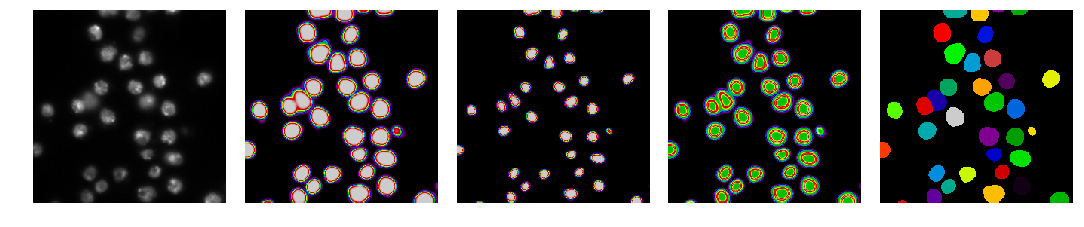

1


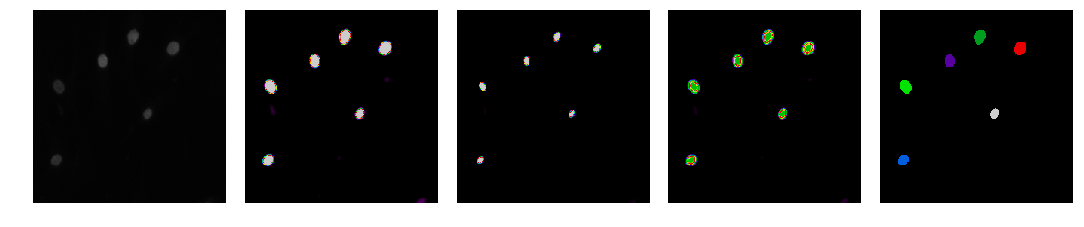

2


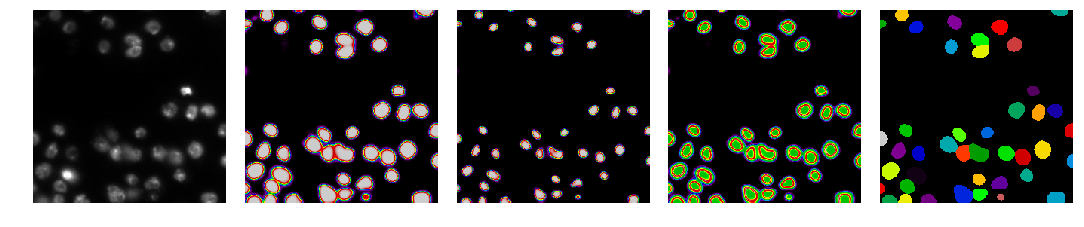

3


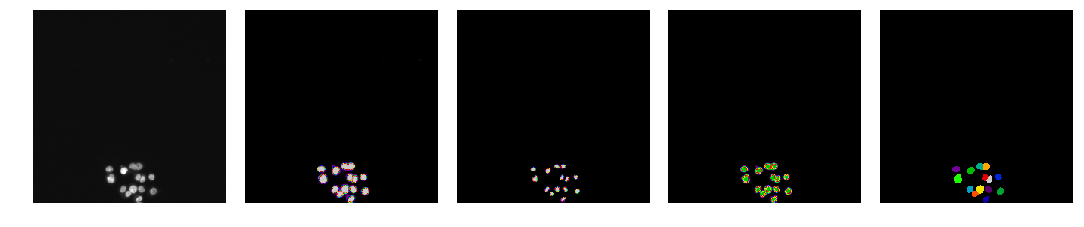

4


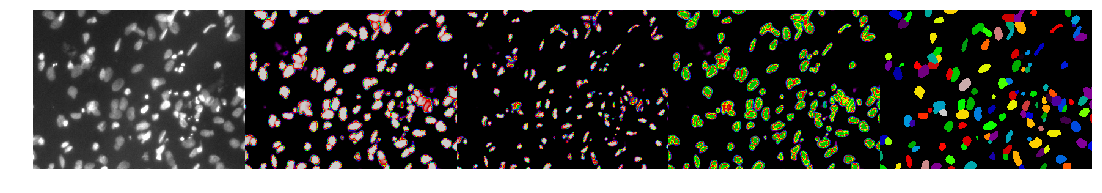

5


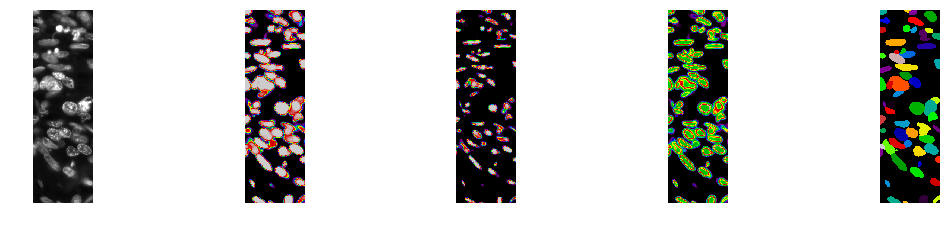

6


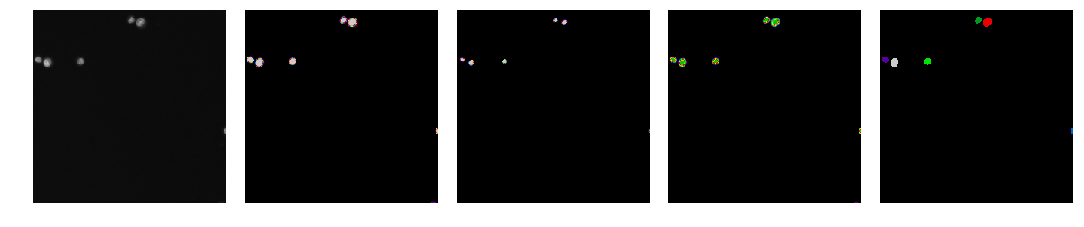

7


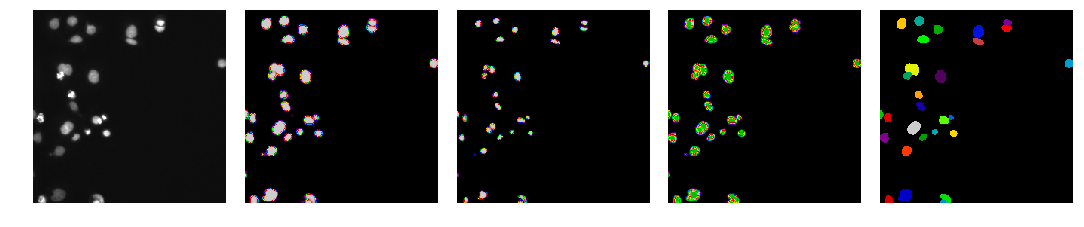

8


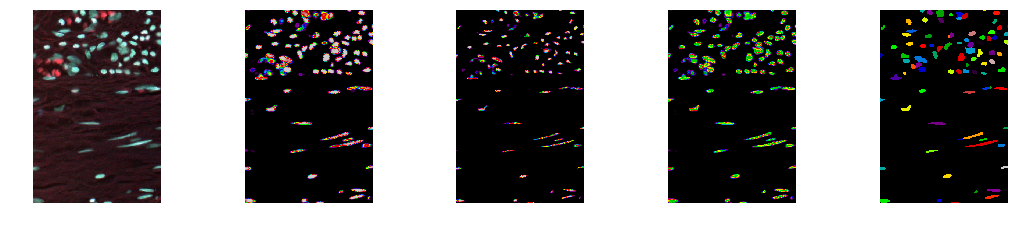

9


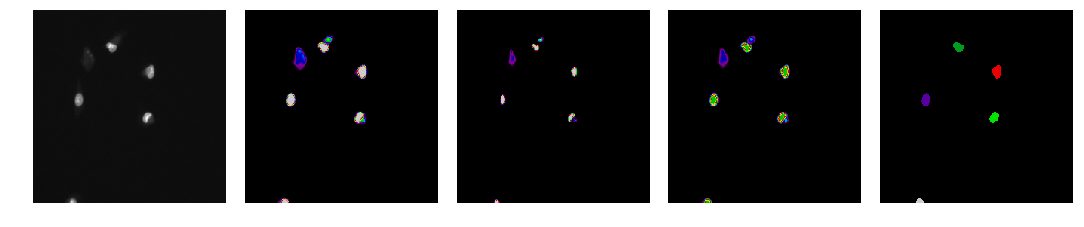

10


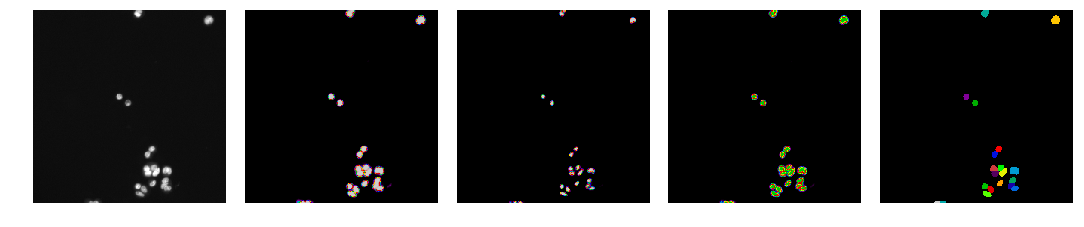

11


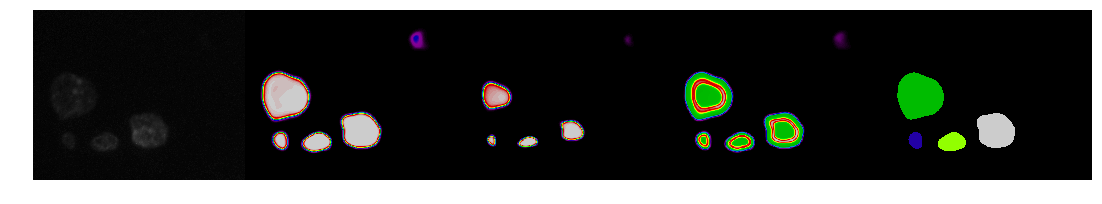

12


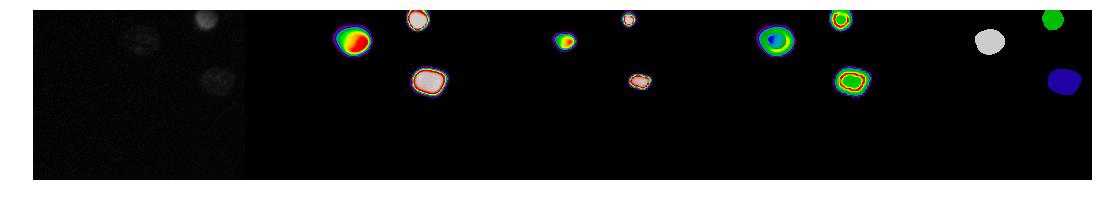

13


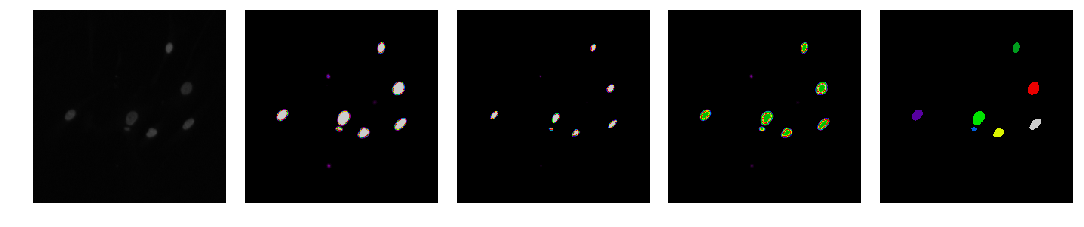

14


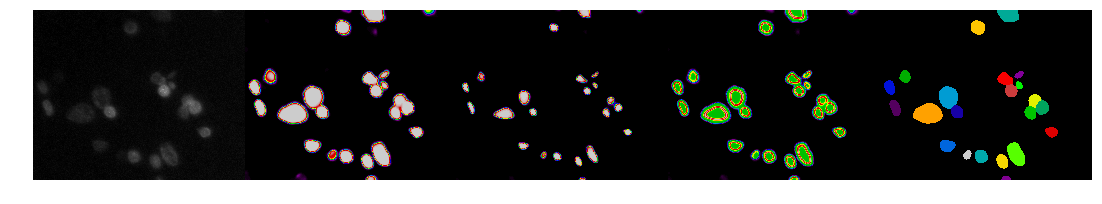

15


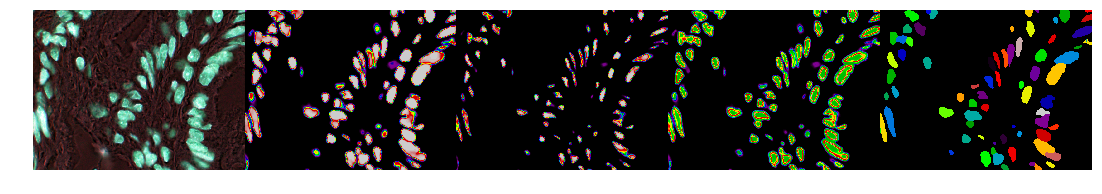

16


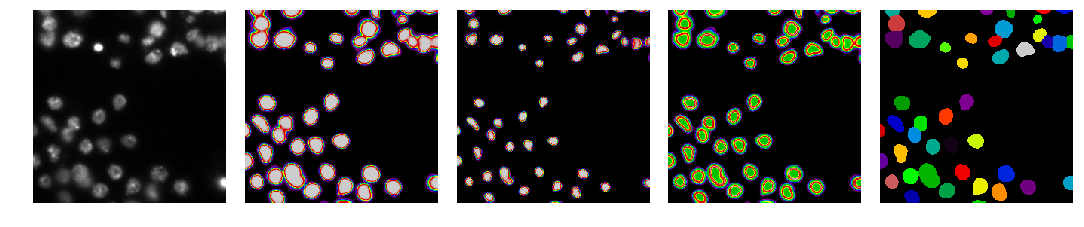

17


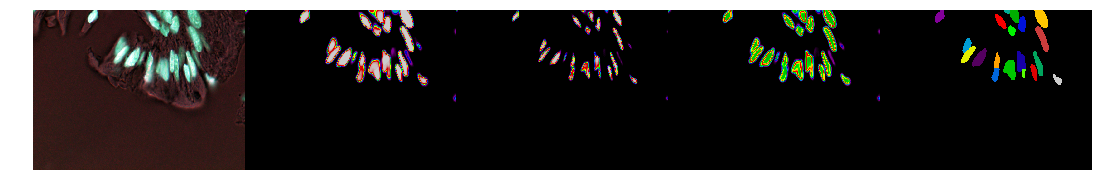

18


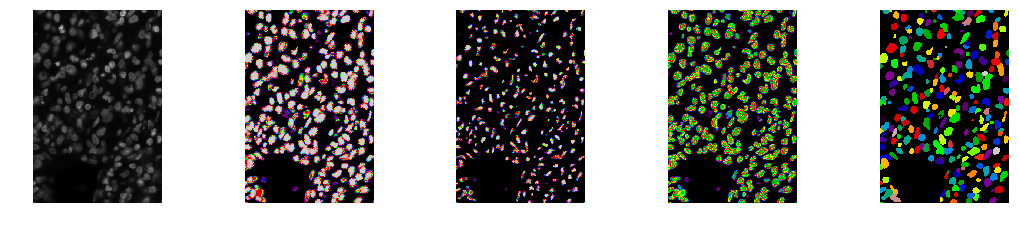

19


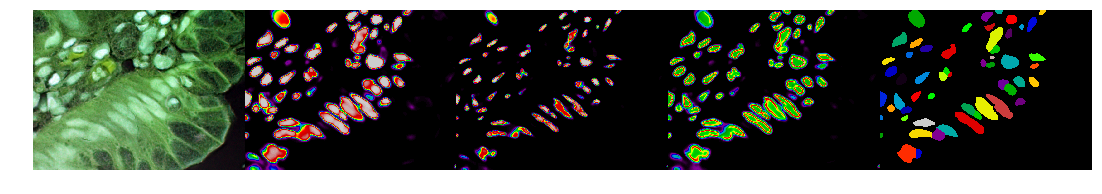

20


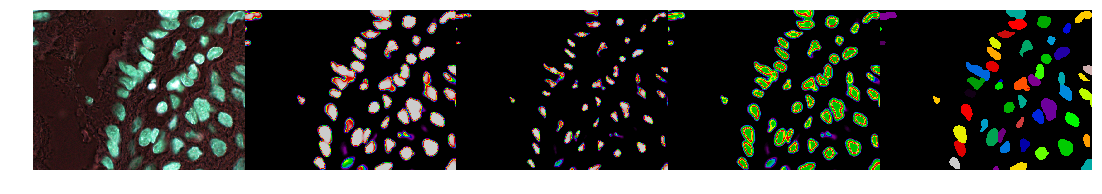

21


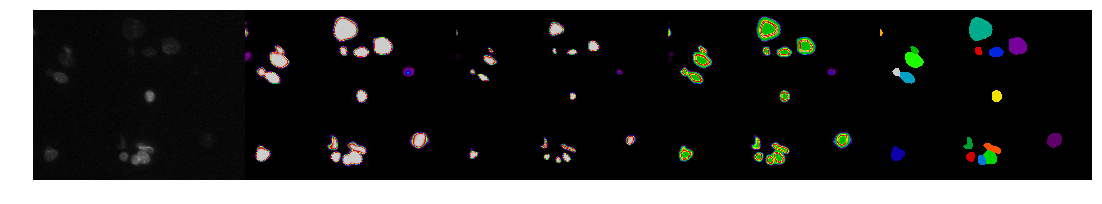

22


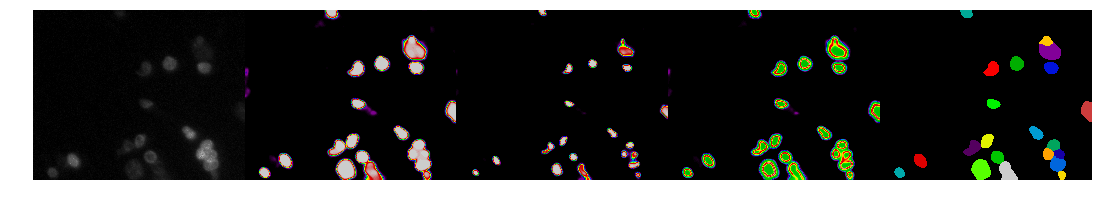

23


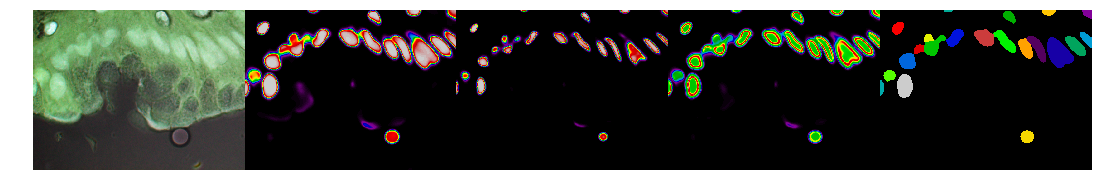

24


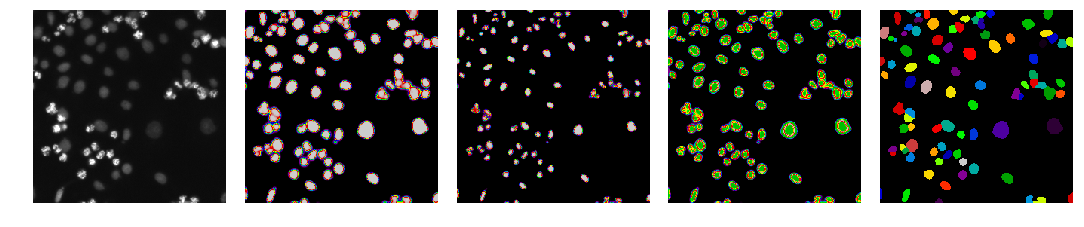

25


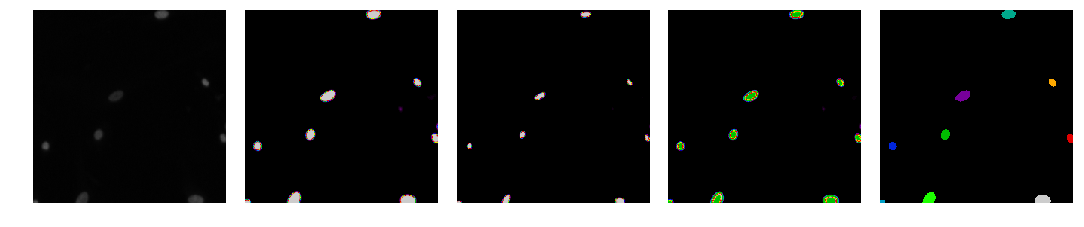

26


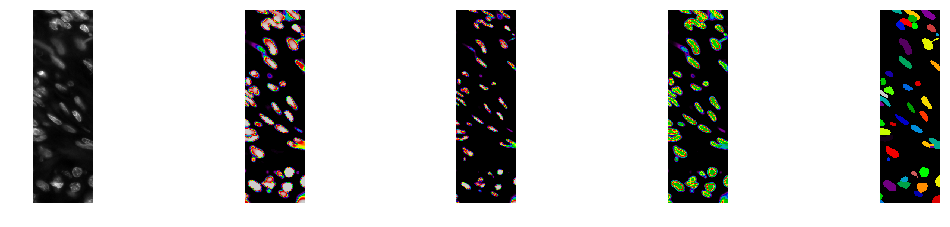

27


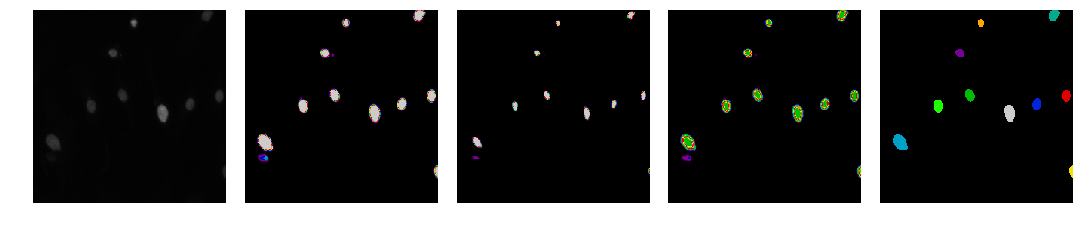

28


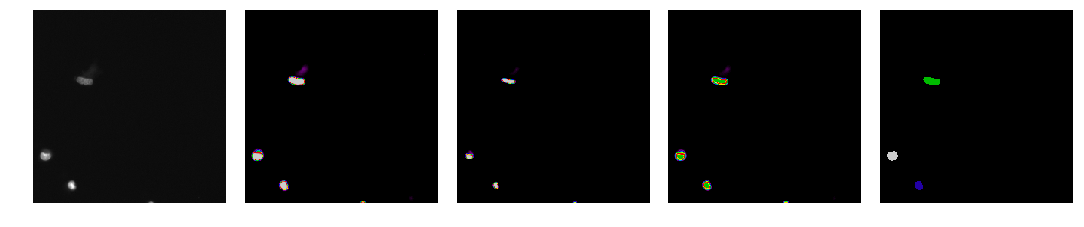

29


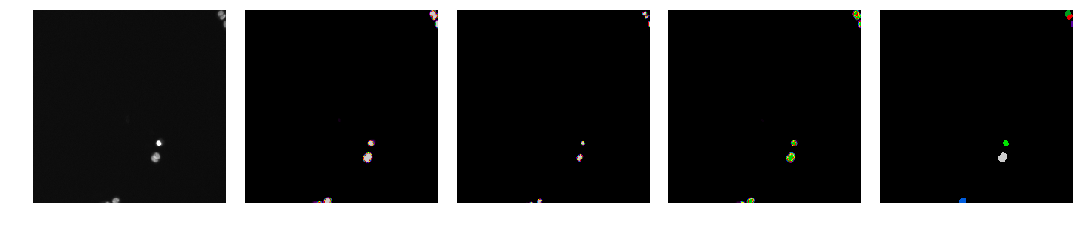

30


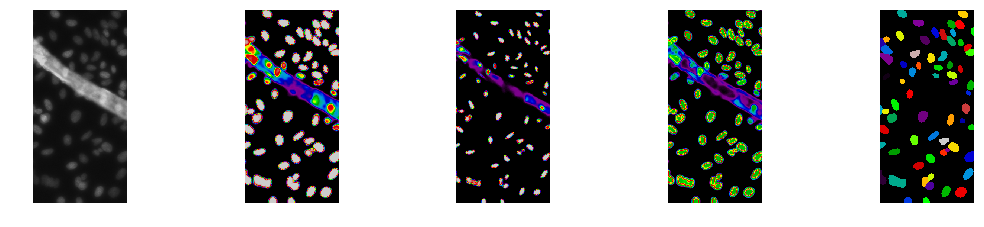

31


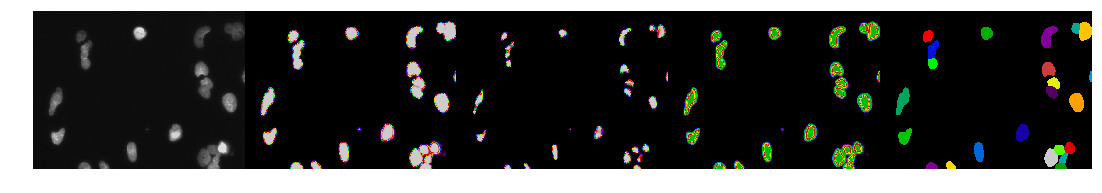

32


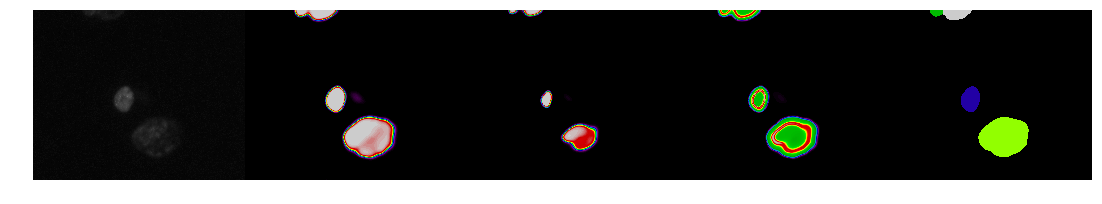

33


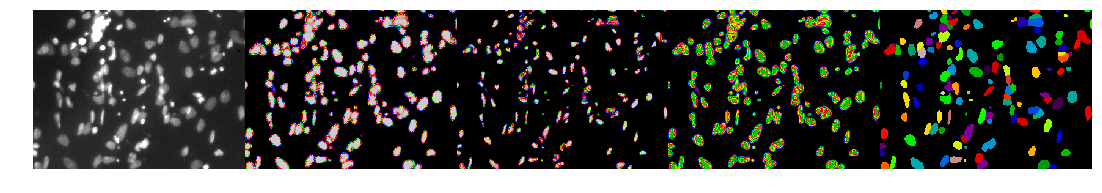

34


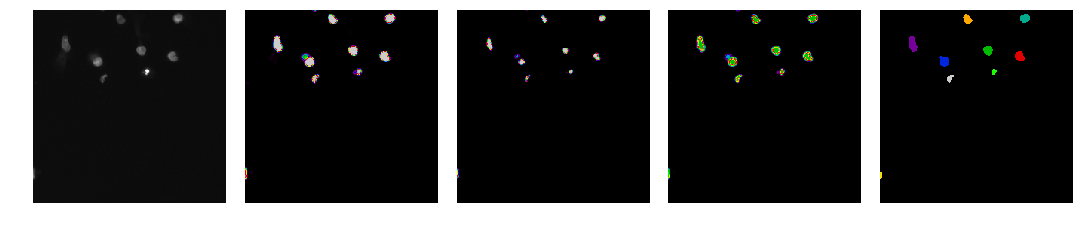

35


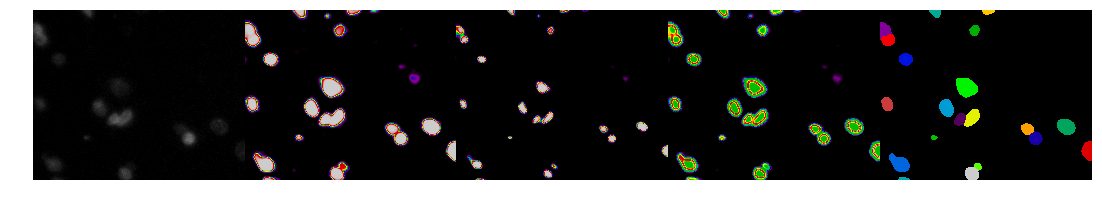

36


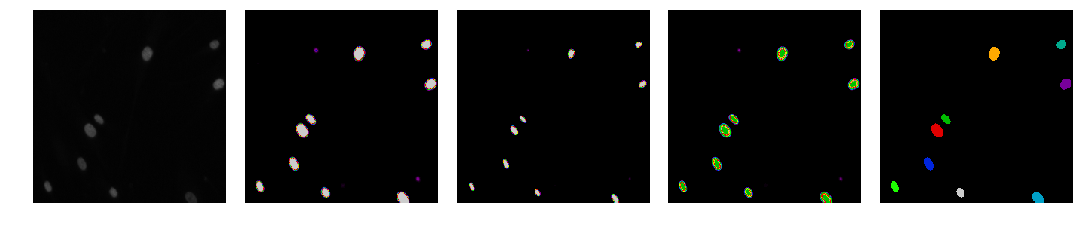

37


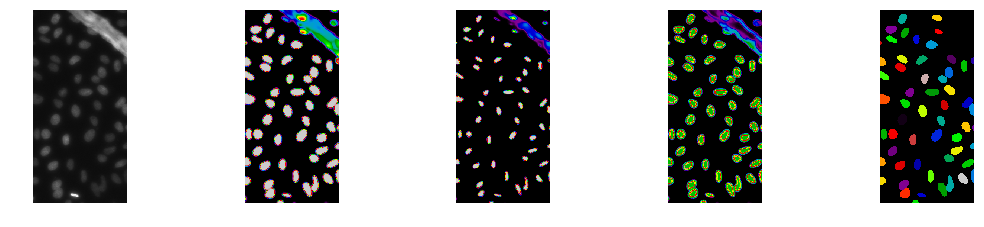

38


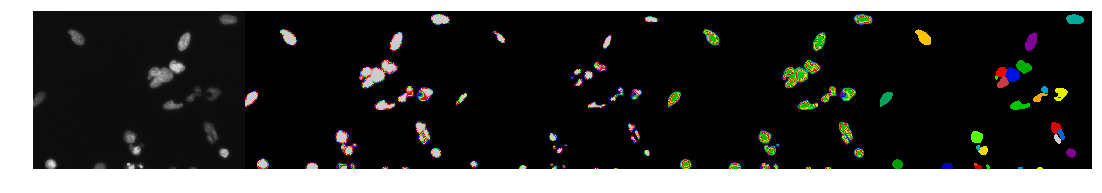

39


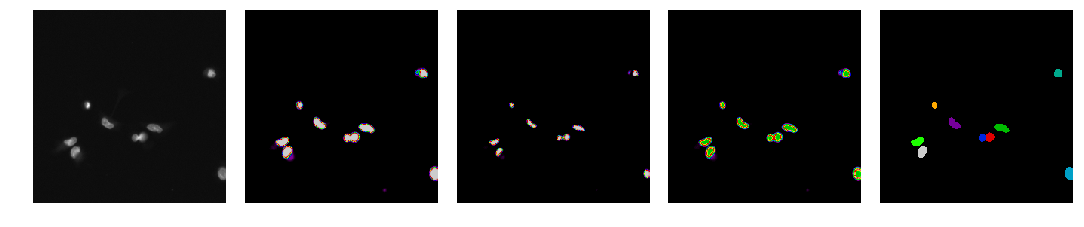

40


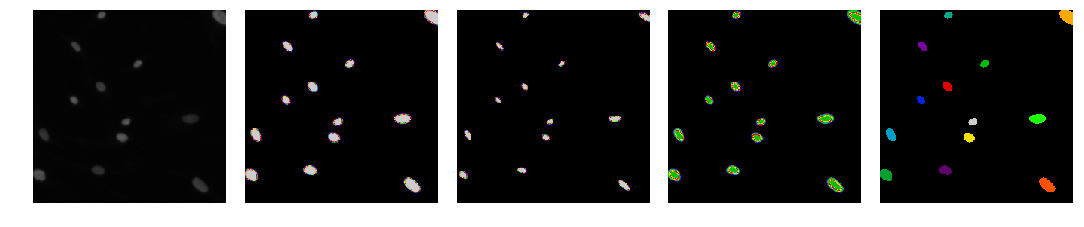

41


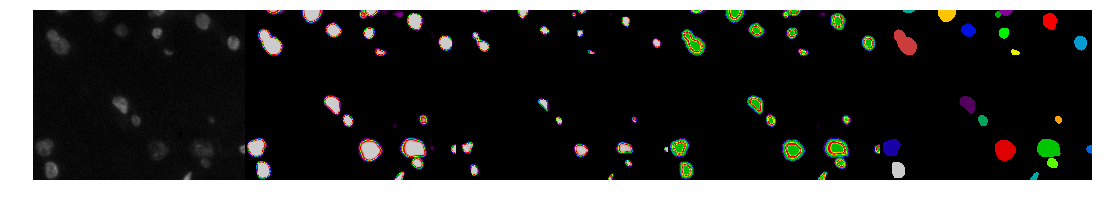

42


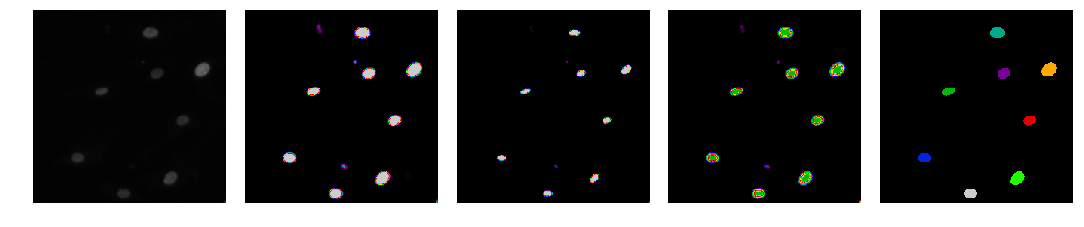

43


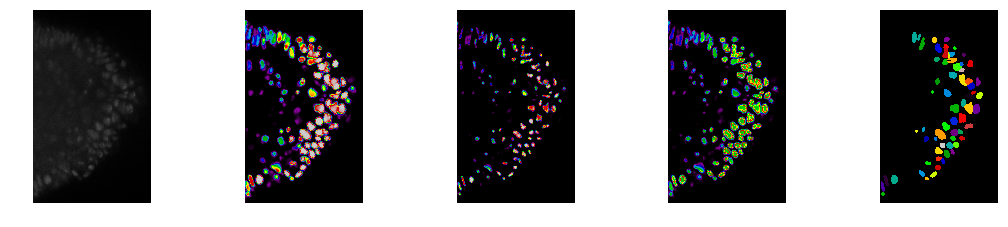

44


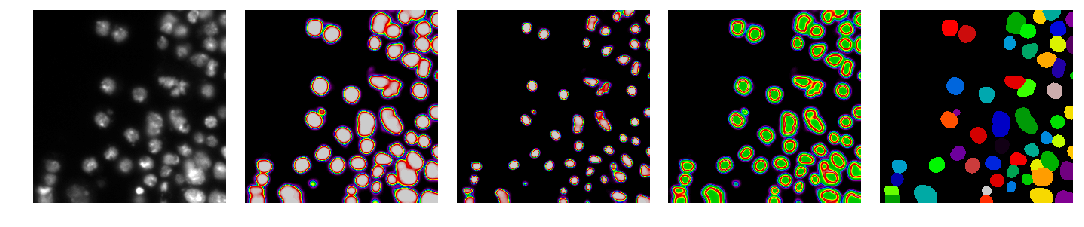

45


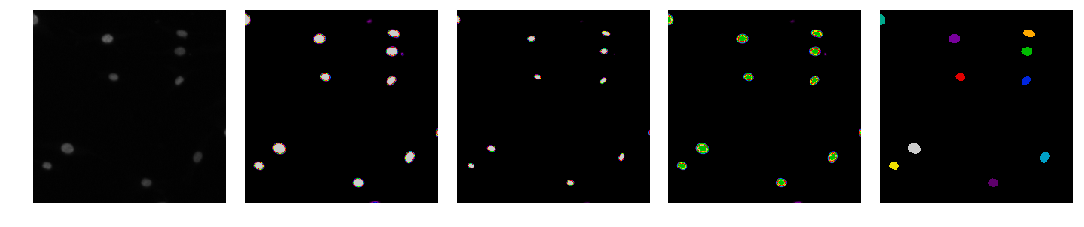

46


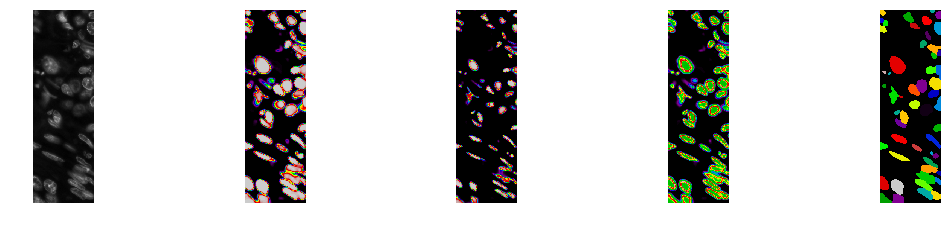

47


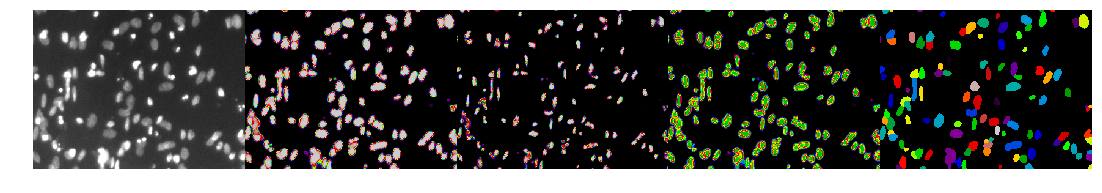

48


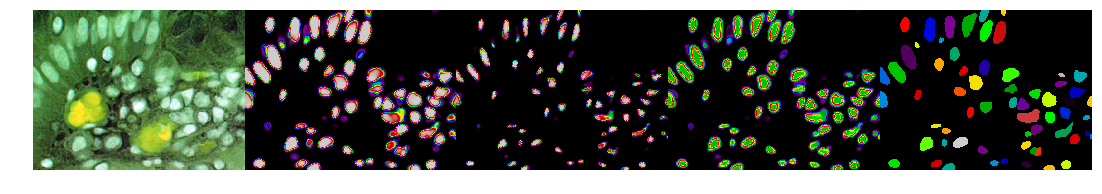

49


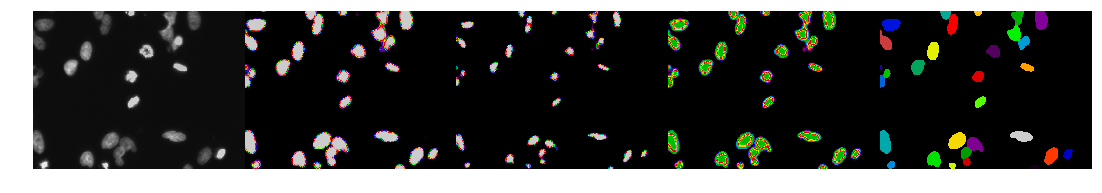

50


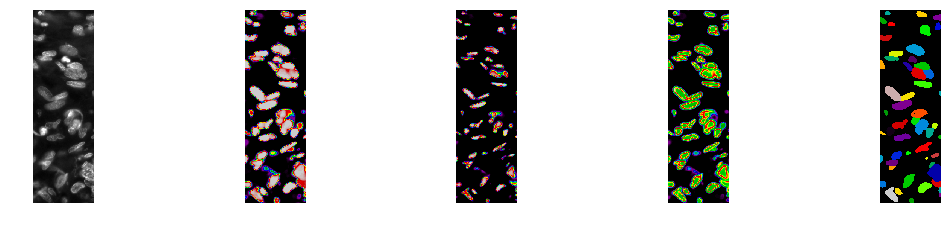

51


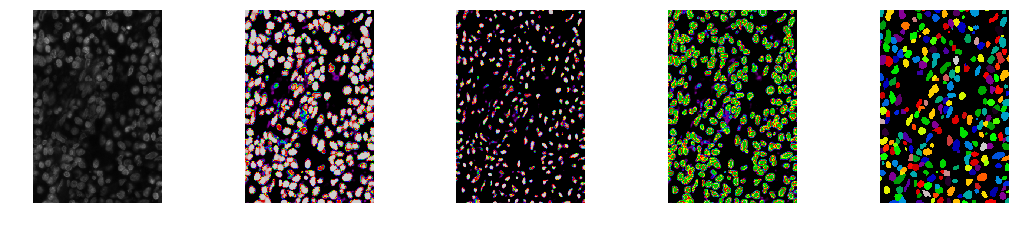

52


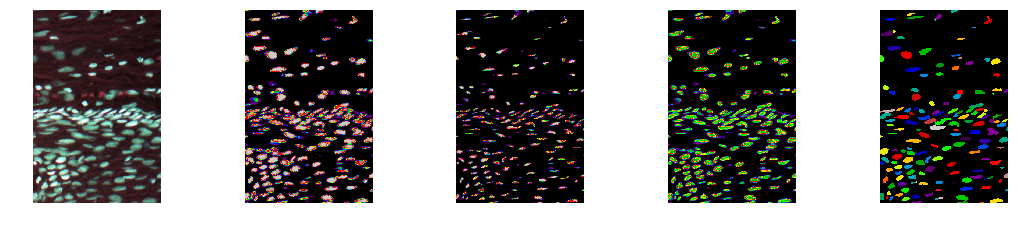

53


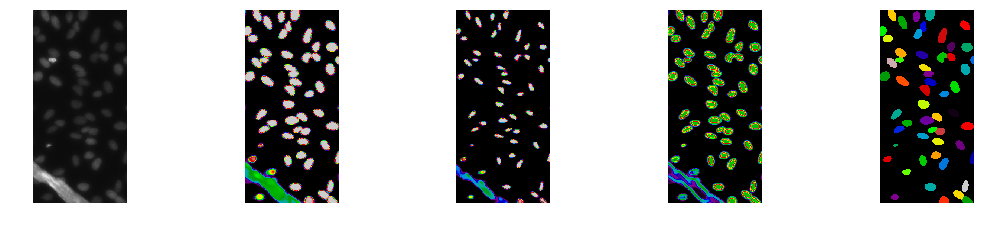

54


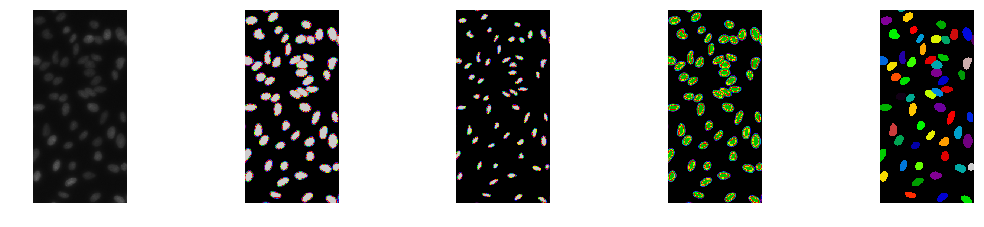

55


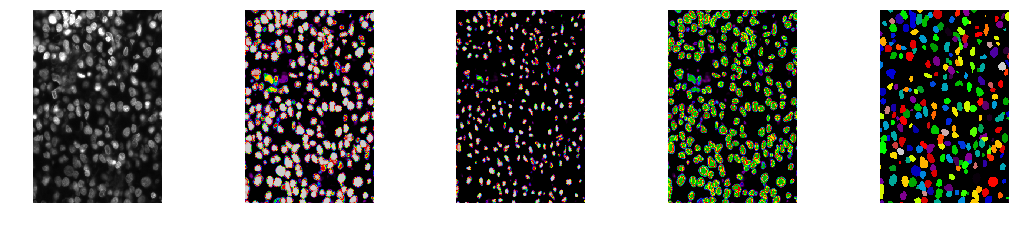

56


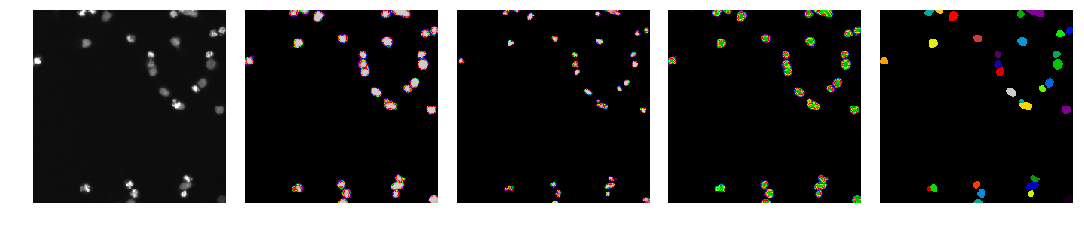

57


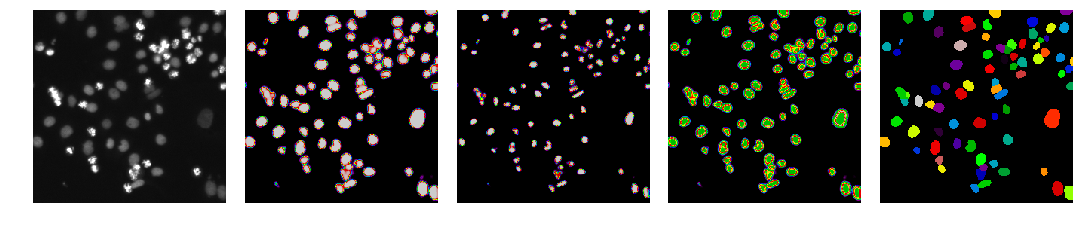

58


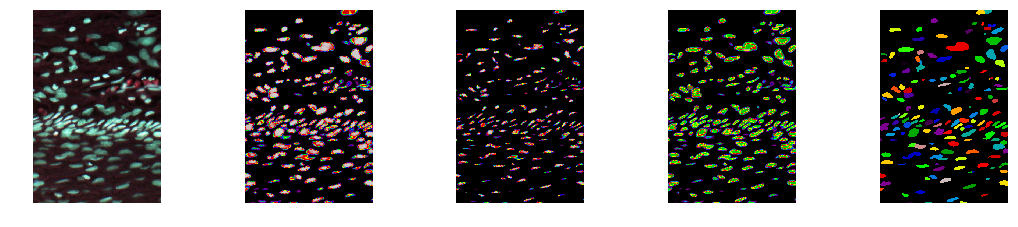

59


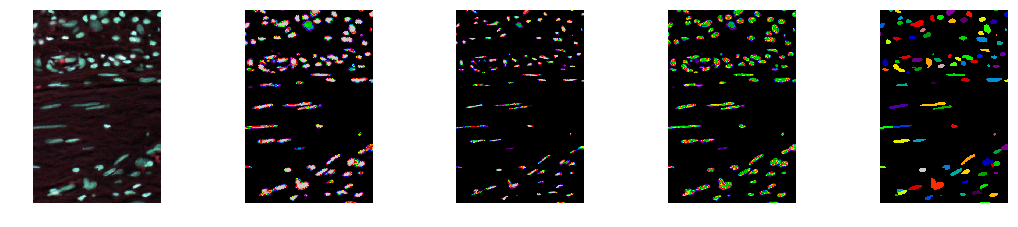

60


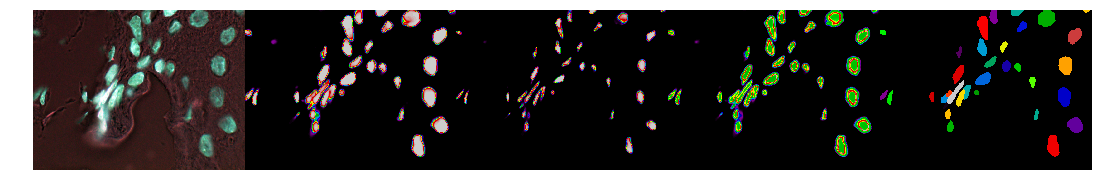

61


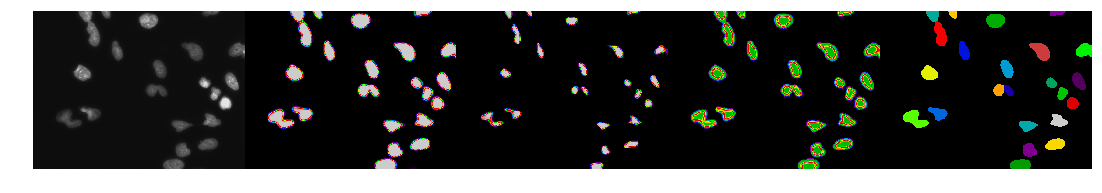

62


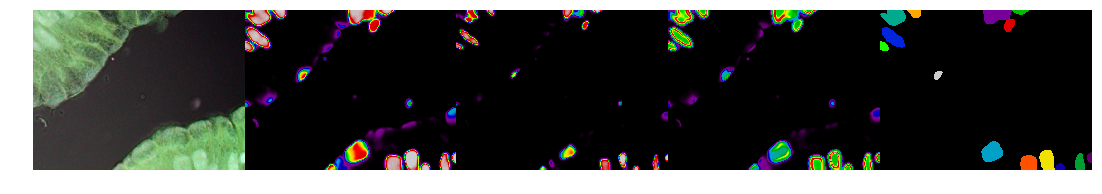

63


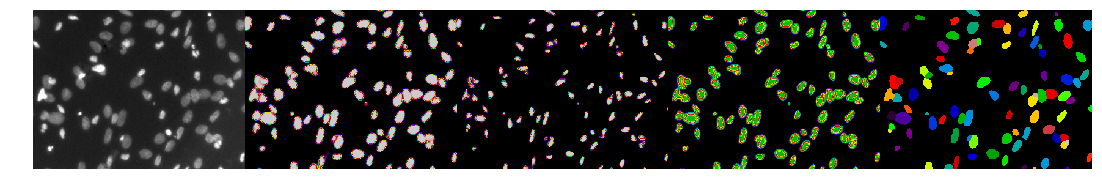

64


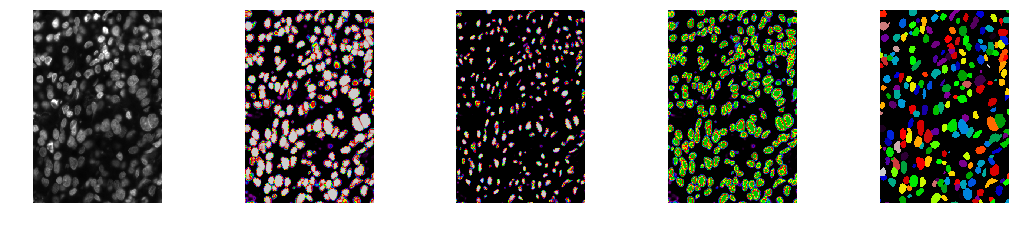

In [101]:
for i in range(len(test_images)):
    print(i)
    draw.plots([
      test_images[i],
      test_predictions[i][..., 0],
        test_predictions[i][..., 1],
        test_predictions[i][..., 2],
      postprocessing.watershed(
        test_predictions[i], mask_threshold=0.5, center_threshold=0.7, padding_size=5, min_size=16) * 12367 % 1000,
    ], scale=3, col_number=5)
    plt.show()

In [102]:
new_ids, rles = utils.mask2rle(test_predictions, test_ids, lambda x: postprocessing.watershed(
        x, mask_threshold=0.5, center_threshold=0.7, padding_size=5, min_size=16)
)

100%|██████████| 65/65 [00:01<00:00, 34.39it/s]


In [103]:
from datetime import datetime
sub = utils.make_submission(
    'ensemble_0_05_05_07_16_{}.csv'.format(datetime.now()), new_ids, rles
)